In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [54]:
df = pd.read_csv("/content/Diabetes.csv")

In [55]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [57]:
df.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
df.tail()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [59]:
num_instances, num_features = df.shape
print(f"\nNumber of instances: {num_instances}")
print(f"Number of features: {num_features}")


print(df.dtypes)



Number of instances: 768
Number of features: 9
Number of times pregnant                                                      int64
Plasma glucose concentration a 2 hours in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                              int64
Triceps skin fold thickness (mm)                                              int64
2-Hour serum insulin (mu U/ml)                                                int64
Body mass index (weight in kg/(height in m)^2)                              float64
Diabetes pedigree function                                                  float64
Age (years)                                                                   int64
Class variable (0 or 1)                                                       int64
dtype: object


In [60]:
df['Class variable (0 or 1)'].value_counts()

0    500
1    268
Name: Class variable (0 or 1), dtype: int64

In [61]:
X = df.drop('Class variable (0 or 1)', axis=1)
y = df['Class variable (0 or 1)']

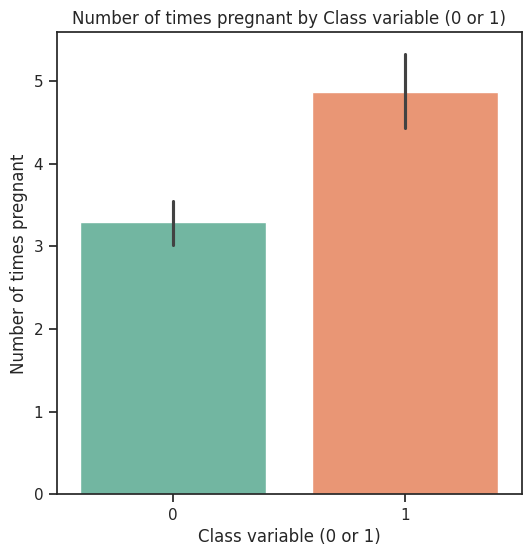

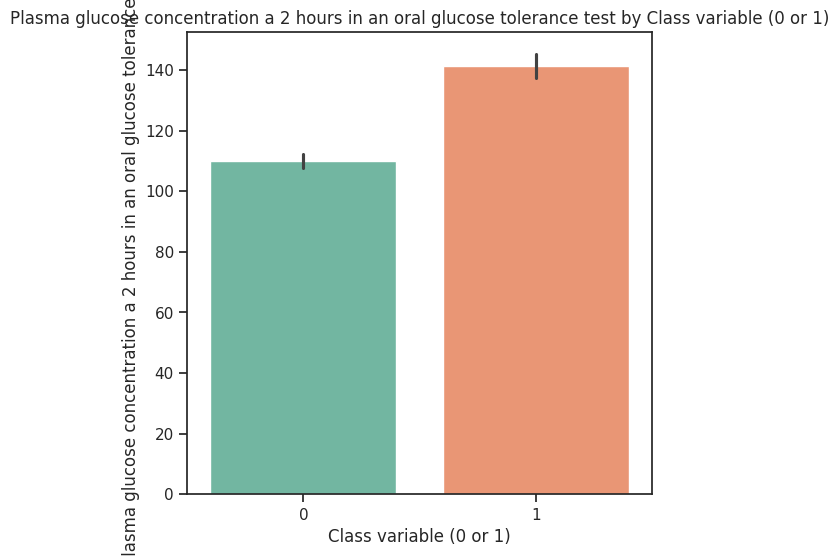

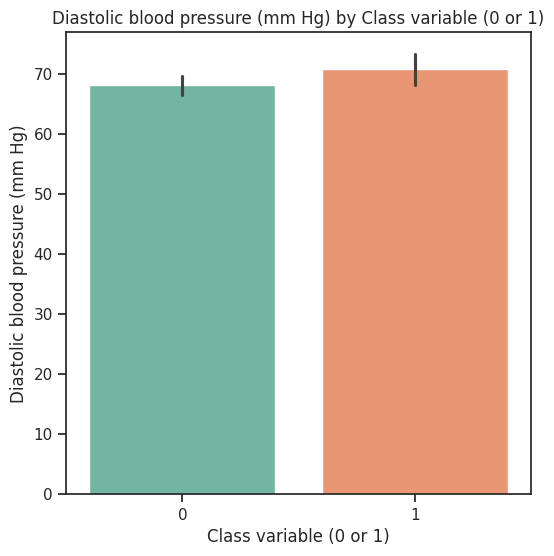

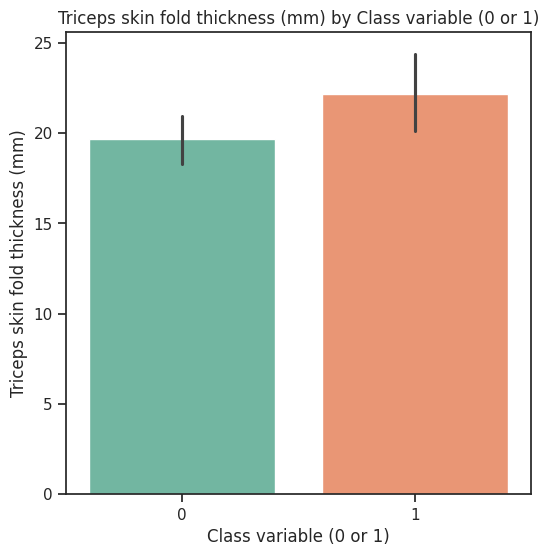

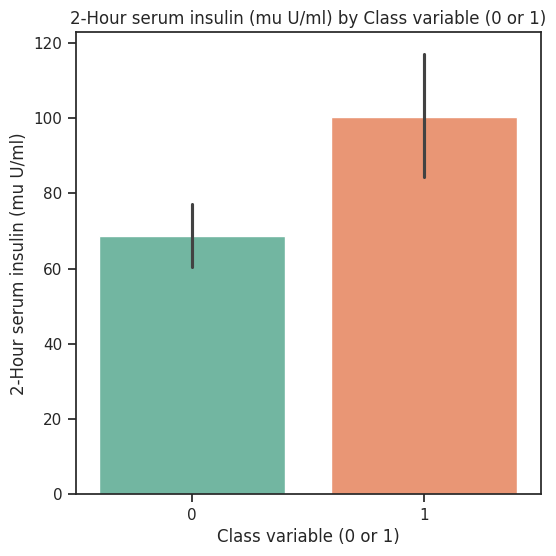

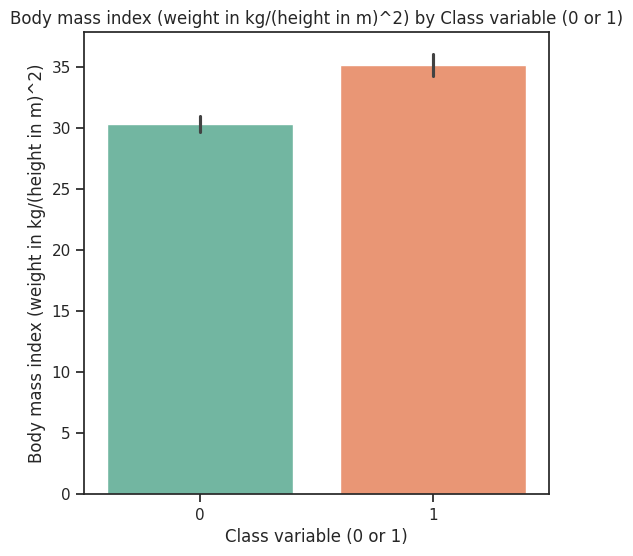

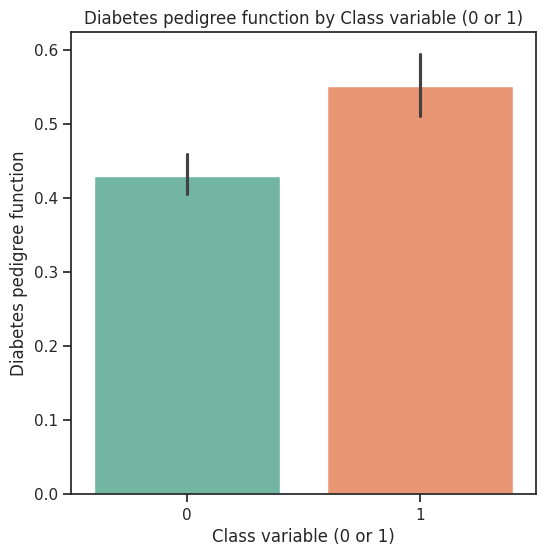

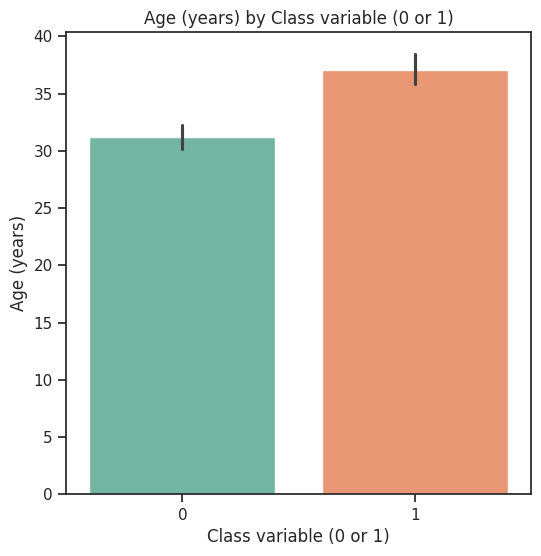

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Number of times pregnant', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test', 'Diastolic blood pressure (mm Hg)', 'Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index (weight in kg/(height in m)^2)', 'Diabetes pedigree function', 'Age (years)']
label = 'Class variable (0 or 1)'

for col in features:
    plt.figure(figsize=(6, 6))
    sns.barplot(x=label, y=col, hue=label, data=df, palette='Set2', legend=False)
    plt.title(f'{col} by {label}')
    plt.show()


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
model = LogisticRegression(max_iter = 1000)


In [65]:
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [66]:

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)


accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))



print(classification_report(y_test, y_pred))


[[78 21]
 [18 37]]
Accuracy of the binary classifier = 0.747
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

